# Quickstart

The partial and full confound tests can characterize whether a predictive model
(e.g. a machine learning model) is biased by the confounder variable.

In research using predictive modelling techniques, confounder-bias is often investigated
(if investigated at all) by testing the association between the confounder variable and
the predictive values.
However, the significance of this association does not necessarily imply a significant
confound-bias of the model, especially if the confounder is also associated to the
true target variable. In this case, namely, the model still might not be directly
driven by the confounder, i.e. the dependence of the predictions on the confounder
can be explained solely by the confounder-target association.
Put simply, this is what is tested by the proposed partial confounder test.

Here we will apply the `partial confounder test` on two simulated datasets:
- H0: null-hypothesis dataset with no confounder bias,
  i.e. conditional independence between the predicted values
  and the confounder variable, given the observed target variable.
  Note that the (unconditional) association between the prediction and the target are significant
  but - according to the H0 of the partial confounder test - can be fully explained by the association
  between the target and the confounder.
- H1: alternative hypothesis with an explicit confounder bias. Here, the association between
  the predictions and the confounder is stronger than what could follow form the association
  between the target and the confounder.


##### Import the necessary packages

In [1]:
from mlconfound.stats import partial_confound_test
from mlconfound.simulate import simulate_y_c_yhat
from mlconfound.plot import plot_null_dist, plot_graph

import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

##### H0 simulations

Next, we simulate some data from the null hypothesis.
For the H0 simulation, the direct contribution of the confounder to the predicted values (`w_cyhat`) is set to zero.

In [8]:
H0_y, H0_c, H0_yhat = simulate_y_c_yhat(w_yc=0.5,
                      w_yyhat=0.5, w_cyhat=0,
                      n=1000, random_state=42)

##### Partial confound test

Now let's perform the partial confounder tests on this data.
The number of permutations and the steps in the Markov-chain Monte Carlo process set to the default values
(1000 and 50, respectively).
Increase the number of permutations for more accurate p-value estimates.

The random seed is set for reproducible results.
The flag `return_null_dist` is set so that the full permutation-based null distribution is returned,
e.g. for plotting purposes.

The pandas dataframe is solely created for "pretty-printing" the results.

In [9]:
ret=partial_confound_test(H0_y, H0_yhat, H0_c, return_null_dist=True,
                  random_state=42)
#pretty print results
pd.DataFrame({
    'p' : [ret.p],
    'ci lower' : [ret.p_ci[0]],
    'ci upper' : [ret.p_ci[1]],
    'R2(y,c)' : [ret.r2_y_c],
    'R2(y^,c)' : [ret.r2_yhat_c],
    'R2(y,y^)' : [ret.r2_y_yhat],
})


Permuting: 100%|██████████| 1000/1000 [00:03<00:00, 323.64it/s]


,p,ci lower,ci upper,"R2(y,c)","R2(y^,c)","R2(y,y^)"
0,0.76,0.732287,0.786173,0.187028,0.031732,0.210914


Let's use the built-in plot functions of the package `mlconfound` for a graphical representation of the results.

<AxesSubplot:title={'center':'null distribution'}, xlabel='R2(y^,c*)', ylabel='count'>

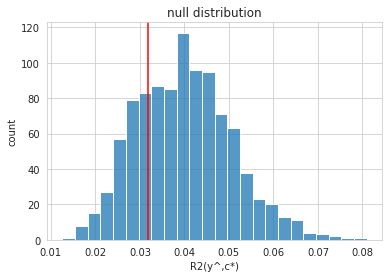

In [10]:
plot_null_dist(ret)

The histogram shows the $R^2$ values between the predictions and the permuted confounder variable
(conditional permutations). The red line indicates that the unpermuted $R^2$ is not "extreme",
i.e. we have no evidence against the null ($p=0.76$).

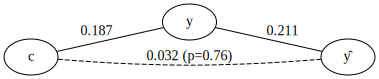

In [11]:
plot_graph(ret)

The graph shows the unconditional $R^2$ values across the target $y$, confounder $c$ and predictions $\hat{y}$.

##### H1 simulations and test

No let's apply the partial confounder test for H1, that is for a confounded model.

In [12]:
H1_y, H1_c, H1_yhat = simulate_y_c_yhat(w_yc=0.5,
                      w_yyhat=0.5, w_cyhat=0.1,
                      n=1000, random_state=42)
ret=partial_confound_test(H1_y, H1_yhat, H1_c, num_perms=1000, return_null_dist=True,
                  random_state=42, n_jobs=-1)

#pretty print results
pd.DataFrame({
    'p' : [ret.p],
    'ci lower' : [ret.p_ci[0]],
    'ci upper' : [ret.p_ci[1]],
    'R2(y,c)' : [ret.r2_y_c],
    'R2(y^,c)' : [ret.r2_yhat_c],
    'R2(y,y^)' : [ret.r2_y_yhat],
})

Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 595.58it/s]


,p,ci lower,ci upper,"R2(y,c)","R2(y^,c)","R2(y,y^)"
0,0.027,0.017867,0.039042,0.187028,0.067903,0.237854


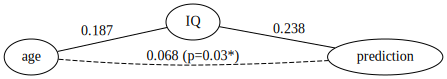

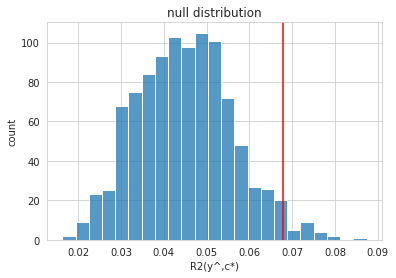

In [7]:
plot_null_dist(ret)
# Note that the labels on the graph plot can be customized:
plot_graph(ret, y_name='IQ', yhat_name='prediction', c_name='age', outfile_base='example')

The low p-value provides evidence against the null hypothesis of
$y$ being conditionally independent on $c$ given $y$ and indicates that the model predictions are biased.

-----------------------------------------------------------------------------
Note

For parametric corrections for multiple comparisons (e.g. false discovery rate in case of testing many confounders), permuted p-values must not be zero.
In this case, permutation based p-values must be adjusted if they are zero.
A decent option could be in this case to use the upper binomial confidence limit (`p_ci[1]`) for FDR.

-----------------------------------------------------------------------------

### References
*Tamas Spisak, A conditional permutation-based approach to test confounder effect and center-bias in
machine learning models, in prep, 2021.*